In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
merged_stats = pd.read_csv('/content/drive/MyDrive/Practicum/merged_stats.csv',index_col=0)
injuries_df = pd.read_csv('/content/drive/MyDrive/Practicum/injuries_df.csv',index_col=0)

In [ ]:
merged_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4874 entries, 0 to 4873
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        4874 non-null   object 
 1   team_abbreviation  4874 non-null   object 
 2   age                4874 non-null   float64
 3   player_height      4874 non-null   float64
 4   player_weight      4874 non-null   float64
 5   season             4874 non-null   object 
 6   Player             4874 non-null   object 
 7   Ht                 4874 non-null   object 
 8   Wt                 4874 non-null   float64
 9   Pos                4874 non-null   object 
 10  Age                4874 non-null   int64  
 11  Tm                 4874 non-null   object 
 12  G                  4874 non-null   int64  
 13  GS                 4874 non-null   int64  
 14  MP                 4874 non-null   float64
 15  FGA                4874 non-null   float64
 16  ORB                4874 

In [ ]:
injuries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11225 entries, 0 to 11224
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    11225 non-null  object
 1   Duplicates              11225 non-null  object
 2   PLAYER_ID               11225 non-null  int64 
 3   Player                  11225 non-null  object
 4   Season                  11225 non-null  object
 5   TEAM_ID                 11225 non-null  int64 
 6   TEAM_Abbr               11225 non-null  object
 7   TEAM_CITY               11225 non-null  object
 8   Health problems         9167 non-null   object
 9   Organ systems           9167 non-null   object
 10  Major anatomical areas  9167 non-null   object
 11  Anatomical sub-areas    9167 non-null   object
 12  Decision                11225 non-null  object
 13  Notes                   11225 non-null  object
dtypes: int64(2), object(12)
memory usage: 1.3+ MB


In [ ]:
merged_stats.head()

,player_name,team_abbreviation,age,player_height,player_weight,season,Player,Ht,Wt,Pos,...,Tm,G,GS,MP,FGA,ORB,DRB,TRB,Year,Team
0,J.R. Smith,DEN,25.0,198.12,99.790240,2010-11,J.R. Smith,6-6,225.0,SF,...,DEN,79,6,24.9,9.9,0.6,3.5,4.1,2010-11,Denver Nuggets
1,JaVale McGee,WAS,23.0,213.36,114.305184,2010-11,JaVale McGee,7-0,270.0,C,...,WAS,79,75,27.8,7.6,2.8,5.2,8.0,2010-11,Washington Wizards
2,Jamaal Magloire,MIA,33.0,210.82,115.665960,2010-11,Jamaal Magloire,6-11,259.0,C,...,MIA,18,0,8.8,1.2,0.9,2.4,3.4,2010-11,Miami Heat
3,James Posey,IND,34.0,203.20,98.429464,2010-11,James Posey,6-8,215.0,SF,...,IND,49,0,17.1,4.9,0.2,2.8,3.0,2010-11,Indiana Pacers
4,Jamario Moon,LAC,31.0,203.20,92.986360,2010-11,Jamario Moon,6-8,205.0,SF,...,LAC,59,20,17.7,4.2,0.4,2.4,2.8,2010-11,Los Angeles Clippers


In [ ]:
merged_stats.drop(columns=['Player','Ht','Wt','Age','Tm','Year'],inplace=True)
merged_stats

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,FGA,ORB,DRB,TRB,Team
0,J.R. Smith,DEN,25.0,198.12,99.790240,2010-11,SF,79,6,24.9,9.9,0.6,3.5,4.1,Denver Nuggets
1,JaVale McGee,WAS,23.0,213.36,114.305184,2010-11,C,79,75,27.8,7.6,2.8,5.2,8.0,Washington Wizards
2,Jamaal Magloire,MIA,33.0,210.82,115.665960,2010-11,C,18,0,8.8,1.2,0.9,2.4,3.4,Miami Heat
3,James Posey,IND,34.0,203.20,98.429464,2010-11,SF,49,0,17.1,4.9,0.2,2.8,3.0,Indiana Pacers
4,Jamario Moon,LAC,31.0,203.20,92.986360,2010-11,SF,59,20,17.7,4.2,0.4,2.4,2.8,Los Angeles Clippers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,Nikola Vucevic,ORL,29.0,210.82,117.933920,2019-20,C,62,62,32.2,16.7,2.3,8.6,10.9,Orlando Magic
4870,Noah Vonleh,DEN,24.0,208.28,116.573144,2019-20,C,36,1,10.5,2.6,1.0,2.4,3.4,Denver Nuggets
4871,Norvel Pelle,PHI,27.0,208.28,104.779752,2019-20,C,24,0,9.7,2.0,0.8,2.2,3.0,Philadelphia 76ers
4872,Nicolas Claxton,BKN,21.0,210.82,97.522280,2019-20,C,15,0,12.5,3.2,1.3,1.7,2.9,Brooklyn Nets


In [ ]:
injuries_df.head()

,Date,Duplicates,PLAYER_ID,Player,Season,TEAM_ID,TEAM_Abbr,TEAM_CITY,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes
0,2010-11-03,A,201148,Brandan Wright,2010-11,1610612744,GSW,Golden State,General health problems,Digestive system,Digestive system,Unclassified,DTD,stomach virus (DTD)
1,2010-11-03,A,201178,Kyrylo Fesenko,2010-11,1610612762,UTA,Utah,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach illness (DNP)
2,2011-03-04,A,202325,Wesley Johnson,2010-11,1610612750,MIN,Minnesota,General health problems,Digestive system,Unclassified,Unclassified,DNP,gastroenteritis / food poisoning (DNP)
3,2012-04-18,A,202336,Larry Sanders,2011-12,1610612749,MIL,Milwaukee,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach flu (DTD)
4,2010-11-13,A,2501,Reggie Evans,2010-11,1610612761,TOR,Toronto,General health problems,Respiratory system,Respiratory system,Unclassified,DNP,flu-like symptoms (DNP)


Let's take a look at a brief summary of the types of injuries

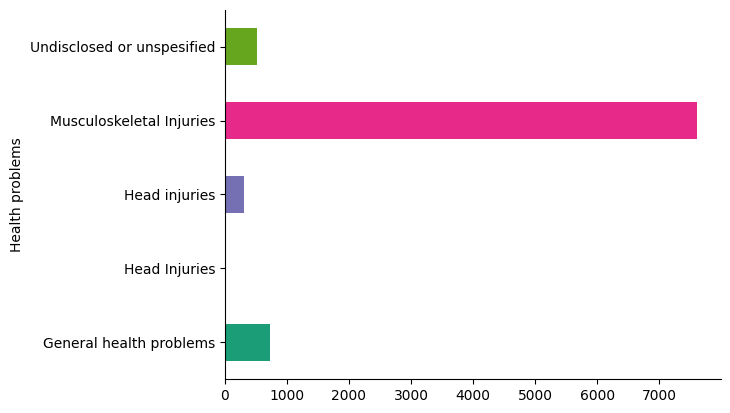

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
injuries_df.groupby('Health problems').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
team_injuries = set(injuries_df.TEAM_Abbr)
team_stats = set(merged_stats.team_abbreviation)
team_injuries- team_stats

set()

In [ ]:
merged_final = pd.merge(merged_stats, injuries_df, left_on=['player_name','season'], right_on=['Player','Season'])
merged_final.head()

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,Season,TEAM_ID,TEAM_Abbr,TEAM_CITY,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes
0,Jameer Nelson,ORL,29.0,182.88,86.18248,2010-11,PG,76,76,30.5,...,2010-11,1610612753,ORL,Orlando,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach virus (DNP)
1,Jameer Nelson,ORL,29.0,182.88,86.18248,2010-11,PG,76,76,30.5,...,2010-11,1610612753,ORL,Orlando,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach virus (DNP)
2,Jameer Nelson,ORL,29.0,182.88,86.18248,2010-11,PG,76,76,30.5,...,2010-11,1610612753,ORL,Orlando,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach flu (DNP)
3,Jameer Nelson,ORL,29.0,182.88,86.18248,2010-11,PG,76,76,30.5,...,2010-11,1610612753,ORL,Orlando,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Knee area,DNP,sprained left knee (DNP)
4,James Anderson,SAS,22.0,198.12,97.52228,2010-11,SF,26,2,11.0,...,2010-11,1610612759,SAS,San Antonio,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Foot area,Out indefinitely,stress fracture in right foot (out indefinitely)


In [ ]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11054 entries, 0 to 11053
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   player_name             11054 non-null  object 
 1   team_abbreviation       11054 non-null  object 
 2   age                     11054 non-null  float64
 3   player_height           11054 non-null  float64
 4   player_weight           11054 non-null  float64
 5   season                  11054 non-null  object 
 6   Pos                     11054 non-null  object 
 7   G                       11054 non-null  int64  
 8   GS                      11054 non-null  int64  
 9   MP                      11054 non-null  float64
 10  FGA                     11054 non-null  float64
 11  ORB                     11054 non-null  float64
 12  DRB                     11054 non-null  float64
 13  TRB                     11054 non-null  float64
 14  Team                    11054 non-null

####Note: some data is being lost, not sure exaactly why though

In [ ]:
merged_final.drop(columns=['Player','PLAYER_ID','Season','TEAM_ID','TEAM_Abbr','TEAM_CITY'],inplace=True)

In [ ]:
merged_final

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,TRB,Team,Date,Duplicates,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes
0,Jameer Nelson,ORL,29.0,182.88,86.182480,2010-11,PG,76,76,30.5,...,3.0,Orlando Magic,2010-12-03,A,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach virus (DNP)
1,Jameer Nelson,ORL,29.0,182.88,86.182480,2010-11,PG,76,76,30.5,...,3.0,Orlando Magic,2010-12-04,D,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach virus (DNP)
2,Jameer Nelson,ORL,29.0,182.88,86.182480,2010-11,PG,76,76,30.5,...,3.0,Orlando Magic,2010-12-06,A,General health problems,Digestive system,Digestive system,Unclassified,DNP,stomach flu (DNP)
3,Jameer Nelson,ORL,29.0,182.88,86.182480,2010-11,PG,76,76,30.5,...,3.0,Orlando Magic,2011-03-28,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Knee area,DNP,sprained left knee (DNP)
4,James Anderson,SAS,22.0,198.12,97.522280,2010-11,SF,26,2,11.0,...,0.9,San Antonio Spurs,2010-11-11,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Foot area,Out indefinitely,stress fracture in right foot (out indefinitely)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,Noah Vonleh,DEN,24.0,208.28,116.573144,2019-20,C,36,1,10.5,...,3.4,Denver Nuggets,2020-02-27,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Ankle area,DTD,right ankle injury (DTD)
11050,Noah Vonleh,DEN,24.0,208.28,116.573144,2019-20,C,36,1,10.5,...,3.4,Denver Nuggets,2020-01-05,A,NaN,NaN,NaN,NaN,returned to lineup,returned to lineup
11051,Nicolas Claxton,BKN,21.0,210.82,97.522280,2019-20,C,15,0,12.5,...,2.9,Brooklyn Nets,2019-12-10,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Thigh area,DTD,left hamstring injury (DTD)
11052,Norman Powell,TOR,27.0,190.50,97.522280,2019-20,SG,52,26,28.4,...,3.7,Toronto Raptors,2019-12-19,A,Musculoskeletal Injuries,Musculoskeletal system,Upper extremity,Shoulder area,Out indefinitely,left shoulder subluxation (out indefinitely)


In [ ]:
#merged_final.to_csv('merged_final.csv')

In [ ]:
health_problems =set(merged_final['Health problems'])

In [ ]:
health_problems

{'General health problems',
 'Head Injuries',
 'Head injuries',
 'Musculoskeletal Injuries',
 'Undisclosed or unspesified',
 nan}

In [ ]:
areas= set(merged_final['Major anatomical areas'])
areas

{'Circulatory system',
 'Digestive system',
 'Ear',
 'Head',
 'Integumentary system',
 'Lower extremity',
 'Mouth',
 'Multiple anatomical areas',
 'Musculoskeletal system',
 'Neck',
 'Nervous system',
 'Reproductive',
 'Respiratory system',
 'Trunk',
 'Unclassified',
 'Upper extremity',
 nan}

In [ ]:
merged_final.loc[merged_final['Health problems'] == 'Head injuries', 'Health problems'] = 'Head Injuries'

In [ ]:
health_problems =set(merged_final['Health problems'])
health_problems

{'General health problems',
 'Head Injuries',
 'Musculoskeletal Injuries',
 'Undisclosed or unspesified',
 nan}

In [ ]:
merged_needed = merged_final.loc[(merged_final['Health problems']=='Head Injuries') | (merged_final['Health problems']=='Musculoskeletal Injuries')]
merged_needed

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,TRB,Team,Date,Duplicates,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes
3,Jameer Nelson,ORL,29.0,182.88,86.182480,2010-11,PG,76,76,30.5,...,3.0,Orlando Magic,2011-03-28,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Knee area,DNP,sprained left knee (DNP)
4,James Anderson,SAS,22.0,198.12,97.522280,2010-11,SF,26,2,11.0,...,0.9,San Antonio Spurs,2010-11-11,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Foot area,Out indefinitely,stress fracture in right foot (out indefinitely)
5,Jamal Crawford,ATL,31.0,195.58,90.718400,2010-11,SG,76,0,30.2,...,1.7,Atlanta Hawks,2010-11-03,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Toes area,DNP,turf toe (DNP)
8,J.J. Redick,ORL,27.0,193.04,86.182480,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-01-31,A,Musculoskeletal Injuries,Musculoskeletal system,Upper extremity,Shoulder area,DTD,sore left shoulder (DTD)
9,J.J. Redick,ORL,27.0,193.04,86.182480,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-03-11,A,Musculoskeletal Injuries,Musculoskeletal system,Trunk,Abdominal area,DNP,lower abdominal strain (DNP)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11048,Noah Vonleh,DEN,24.0,208.28,116.573144,2019-20,C,36,1,10.5,...,3.4,Denver Nuggets,2019-12-30,A,Musculoskeletal Injuries,Musculoskeletal system,Trunk,Pelvic area,DTD,bruised gluteus (DTD)
11049,Noah Vonleh,DEN,24.0,208.28,116.573144,2019-20,C,36,1,10.5,...,3.4,Denver Nuggets,2020-02-27,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Ankle area,DTD,right ankle injury (DTD)
11051,Nicolas Claxton,BKN,21.0,210.82,97.522280,2019-20,C,15,0,12.5,...,2.9,Brooklyn Nets,2019-12-10,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Thigh area,DTD,left hamstring injury (DTD)
11052,Norman Powell,TOR,27.0,190.50,97.522280,2019-20,SG,52,26,28.4,...,3.7,Toronto Raptors,2019-12-19,A,Musculoskeletal Injuries,Musculoskeletal system,Upper extremity,Shoulder area,Out indefinitely,left shoulder subluxation (out indefinitely)


In [ ]:
#merged_needed.to_csv('merged_needed.csv')

In [ ]:
areas= set(merged_needed['Major anatomical areas'])
areas

{'Head',
 'Lower extremity',
 'Multiple anatomical areas',
 'Musculoskeletal system',
 'Neck',
 'Nervous system',
 'Trunk',
 'Upper extremity'}

In [ ]:
# nervous_system = merged_needed.loc[(merged_needed['Major anatomical areas']=='Nervous system')]

In [ ]:
merged_needed.loc[(merged_needed['Major anatomical areas']=='Nervous system')]

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,TRB,Team,Date,Duplicates,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes
33,Gary Neal,SAS,26.0,193.04,95.254320,2010-11,SG,80,1,21.1,...,2.5,San Antonio Spurs,2011-02-27,D,Head Injuries,Nervous system,Nervous system,Cranial area,DNP,concussion symptoms (DNP)
229,Carlos Delfino,MIL,28.0,198.12,104.326160,2010-11,SF,49,40,32.4,...,4.1,Milwaukee Bucks,2010-12-21,D,Head Injuries,Nervous system,Nervous system,Cranial area,DNP,concussion (DNP)
230,Carlos Delfino,MIL,28.0,198.12,104.326160,2010-11,SF,49,40,32.4,...,4.1,Milwaukee Bucks,2010-12-23,D,Head Injuries,Nervous system,Nervous system,Cranial area,DNP,concussion (DNP)
302,Ersan Ilyasova,MIL,24.0,208.28,106.594120,2010-11,PF,60,34,25.1,...,6.1,Milwaukee Bucks,2011-03-04,D,Head Injuries,Nervous system,Nervous system,Cranial area,DNP,concussion (DNP)
303,Ersan Ilyasova,MIL,24.0,208.28,106.594120,2010-11,PF,60,34,25.1,...,6.1,Milwaukee Bucks,2011-03-06,D,Head Injuries,Nervous system,Nervous system,Cranial area,DNP,concussion (DNP)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,Matt Barnes,LAC,34.0,200.66,102.511792,2013-14,SF,63,40,27.5,...,4.6,Los Angeles Clippers,2013-12-14,D,Head Injuries,Nervous system,Nervous system,Eye area,DNP,recovering from surgery on left eye (DNP)
5045,Matt Barnes,LAC,34.0,200.66,102.511792,2013-14,SF,63,40,27.5,...,4.6,Los Angeles Clippers,2013-12-16,D,Head Injuries,Nervous system,Nervous system,Eye area,DNP,recovering from surgery on left eye (DNP)
5274,Rudy Gay,SAC,28.0,203.20,104.326160,2014-15,SF,68,67,35.4,...,5.9,Sacramento Kings,2015-04-08,D,Head Injuries,Nervous system,Nervous system,Cranial area,Out for season,concussion (out for season)
6595,Brandon Bass,LAL,31.0,203.20,113.398000,2015-16,PF,66,0,20.3,...,4.3,Los Angeles Lakers,2016-03-15,D,Head Injuries,Nervous system,Nervous system,Unclassified,DTD,corneal abrasion in right eye (DTD)


In [ ]:
# set(nervous_system['Health problems'])

{'Head Injuries'}

Looks like all the nervous system injuries are head injuries, so reclassifying them to that.

In [ ]:
merged_needed.loc[merged_needed['Major anatomical areas'] == 'Nervous system', 'Major anatomical areas'] = 'Head'

In [ ]:
areas= set(merged_needed['Major anatomical areas'])
areas

{'Head',
 'Lower extremity',
 'Multiple anatomical areas',
 'Musculoskeletal system',
 'Neck',
 'Trunk',
 'Upper extremity'}

In [ ]:
musc_skel = merged_needed.loc[(merged_needed['Major anatomical areas']== 'Musculoskeletal system')]

In [ ]:
up_ex = merged_needed.loc[(merged_needed['Major anatomical areas']== 'Upper extremity')]
low_ex =  merged_needed.loc[(merged_needed['Major anatomical areas']== 'Lower extremity')]
neck =  merged_needed.loc[(merged_needed['Major anatomical areas']== 'Neck')]
trunk =  merged_needed.loc[(merged_needed['Major anatomical areas']== 'Trunk')]

In [ ]:
set(musc_skel['Health problems'])

{'Head Injuries', 'Musculoskeletal Injuries'}

In [ ]:
musc_skel.loc[(musc_skel['Health problems']== 'Head Injuries')]

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,TRB,Team,Date,Duplicates,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes


Changing to head injuries which are present in muscoskeletal system in major anatomic areas

In [ ]:
merged_needed.loc[(merged_needed['Major anatomical areas'] == 'Musculoskeletal system') & (merged_needed['Health problems'] == 'Head Injuries'), 'Major anatomical areas'] = 'Head'

In [ ]:
set(merged_needed['Major anatomical areas'])

{'Head',
 'Lower extremity',
 'Multiple anatomical areas',
 'Musculoskeletal system',
 'Neck',
 'Trunk',
 'Upper extremity'}

In [ ]:
set(musc_skel['Anatomical sub-areas'])

{'Abdominal area',
 'Ankle area',
 'Ankle area / Elbow area',
 'Calf area',
 'Chest area',
 'Elbow area',
 'Eye area',
 'Fibular area',
 'Fingers area',
 'Foot area',
 'Forearm area',
 'Hand area',
 'Heel area',
 'Hip area',
 'Hip area / Thoracolumbar area',
 'Knee area',
 'Mouth area',
 'Multiple anatomical areas',
 'Neck',
 'Other facial areas',
 'Pelvic area',
 'Pubis area',
 'Shin area',
 'Shoulder area',
 'Thigh area',
 'Thigh area / Abdominal area',
 'Thigh area / Thoracolumbar area',
 'Thoracolumbar area',
 'Thumb area',
 'Thumb area / Toes area',
 'Toes area',
 'Upper arm area',
 'Wrist area'}

In [ ]:
set(up_ex['Anatomical sub-areas'])

{'Elbow area',
 'Fingers area',
 'Hand area',
 'Hand, Thumb & Fingers area',
 'Shoulder area',
 'Upper arm and Forearm area',
 'Wrist area'}

In [ ]:
set(low_ex['Anatomical sub-areas'])

{'Ankle area',
 'Calf area',
 'Fibular area',
 'Foot area',
 'Heel area',
 'Hip area',
 'Knee area',
 'Multiple anatomical areas',
 'Shin area',
 'Thigh area',
 'Toes area'}

In [ ]:
set(trunk['Anatomical sub-areas'])

{'Abdominal area', 'Chest area', 'Pelvic area', 'Thoracolumbar area'}

In [ ]:
set(neck['Anatomical sub-areas'])

{'Neck'}

In [ ]:
multiple=(merged_needed.loc[(merged_needed['Major anatomical areas']== 'Multiple anatomical areas')])

In [ ]:
set(multiple['Anatomical sub-areas'])

{'Ankle area / Abdominal area',
 'Ankle area / Elbow area',
 'Calf area / Elbow area',
 'Chest area / Knee area',
 'Chest area / Shoulder area',
 'Elbow area / Nose area',
 'Foot area / Chest area',
 'Forearm area / Hip area',
 'Hip area / Thoracolumbar area',
 'Knee area / Neck',
 'Knee area / Thoracolumbar area',
 'Knee area/Shoulder area',
 'Shoulder area / Ankle area',
 'Thigh area / Thoracolumbar area',
 'Thoracolumbar area / Ankle area',
 'Thumb area / Toes area',
 'Upper arm area/Hand area',
 'Wrist area / Ankle area',
 'Wrist area / Knee area'}

In [ ]:
merged_needed.loc[(merged_needed['Major anatomical areas']== 'Musculoskeletal system')]

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,TRB,Team,Date,Duplicates,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes
10,J.J. Redick,ORL,27.0,193.04,86.18248,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-03-16,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Abdominal area,DNP,lower abdominal strain (DNP)
11,J.J. Redick,ORL,27.0,193.04,86.18248,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-03-18,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Abdominal area,DNP,lower abdominal strain (DNP)
12,J.J. Redick,ORL,27.0,193.04,86.18248,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-03-21,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Abdominal area,DNP,lower abdominal strain (DNP)
13,J.J. Redick,ORL,27.0,193.04,86.18248,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-03-23,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Abdominal area,DNP,lower abdominal strain (DNP)
14,J.J. Redick,ORL,27.0,193.04,86.18248,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-03-25,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Abdominal area,DNP,lower abdominal strain (DNP)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11005,Paul George,LAC,30.0,203.20,99.79024,2019-20,SF,48,48,29.6,...,5.7,Los Angeles Clippers,2020-02-21,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Thigh area,DTD,strained left hamstring (DTD)
11009,Ricky Rubio,PHX,29.0,190.50,86.18248,2019-20,PG,65,65,31.0,...,4.7,Phoenix Suns,2019-11-21,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Thoracolumbar area,DTD,back spasms (DTD)
11021,Moritz Wagner,WAS,23.0,210.82,111.13004,2019-20,C,45,5,18.6,...,4.9,Washington Wizards,2019-12-13,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Ankle area,DTD,sprained left ankle (DTD)
11026,Nassir Little,POR,20.0,195.58,99.79024,2019-20,PF,48,5,11.9,...,2.3,Portland Trail Blazers,2019-12-20,D,Musculoskeletal Injuries,Musculoskeletal system,Musculoskeletal system,Thoracolumbar area,DTD,back spasms (DTD)


In [ ]:
musc_skel[['Health problems','Major anatomical areas','Anatomical sub-areas']]

,Health problems,Major anatomical areas,Anatomical sub-areas
10,Musculoskeletal Injuries,Musculoskeletal system,Abdominal area
11,Musculoskeletal Injuries,Musculoskeletal system,Abdominal area
12,Musculoskeletal Injuries,Musculoskeletal system,Abdominal area
13,Musculoskeletal Injuries,Musculoskeletal system,Abdominal area
14,Musculoskeletal Injuries,Musculoskeletal system,Abdominal area
...,...,...,...
11005,Musculoskeletal Injuries,Musculoskeletal system,Thigh area
11009,Musculoskeletal Injuries,Musculoskeletal system,Thoracolumbar area
11021,Musculoskeletal Injuries,Musculoskeletal system,Ankle area
11026,Musculoskeletal Injuries,Musculoskeletal system,Thoracolumbar area


In [ ]:
#merged_needed.loc[(merged_needed['Major anatomical areas']== 'Musculoskeletal system')]

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,TRB,Team,Date,Duplicates,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes


In [ ]:
mapping_dict = {
    'Abdominal area': 'Trunk',
    'Ankle area': 'Lower extremity',
    'Ankle area / Elbow area': 'Multiple anatomical areas',
    'Calf area': 'Lower extremity',
    'Chest area': 'Trunk',
    'Elbow area': 'Upper extremity',
    'Fibular area': 'Lower extremity',
    'Fingers area': 'Upper extremity',
    'Foot area': 'Lower extremity',
    'Forearm area': 'Upper extremity',
    'Hand area': 'Upper extremity',
    'Heel area': 'Lower extremity',
    'Hip area': 'Lower extremity',
    'Hip area / Thoracolumbar area': 'Multiple anatomical areas',
    'Knee area': 'Lower extremity',
    'Multiple anatomical areas': 'Multiple anatomical areas',
    'Neck': 'Neck',
    'Pelvic area': 'Trunk',
    'Pubis area': 'Lower extremity',
    'Shin area': 'Lower extremity',
    'Shoulder area': 'Upper extremity',
    'Thigh area': 'Lower extremity',
    'Thigh area / Abdominal area': 'Multiple anatomical areas',
    'Thigh area / Thoracolumbar area': 'Multiple anatomical areas',
    'Thoracolumbar area': 'Trunk',
    'Thumb area': 'Upper extremity',
    'Thumb area / Toes area': 'Multiple anatomical areas',
    'Toes area': 'Lower extremity',
    'Upper arm area': 'Upper extremity',
    'Wrist area': 'Upper extremity'
}

In [ ]:
mask = merged_needed['Major anatomical areas'] == 'Musculoskeletal system'
merged_needed.loc[mask, 'Major anatomical areas'] = merged_needed.loc[mask, 'Anatomical sub-areas'].map(mapping_dict)

In [ ]:
merged_needed

,player_name,team_abbreviation,age,player_height,player_weight,season,Pos,G,GS,MP,...,TRB,Team,Date,Duplicates,Health problems,Organ systems,Major anatomical areas,Anatomical sub-areas,Decision,Notes
3,Jameer Nelson,ORL,29.0,182.88,86.182480,2010-11,PG,76,76,30.5,...,3.0,Orlando Magic,2011-03-28,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Knee area,DNP,sprained left knee (DNP)
4,James Anderson,SAS,22.0,198.12,97.522280,2010-11,SF,26,2,11.0,...,0.9,San Antonio Spurs,2010-11-11,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Foot area,Out indefinitely,stress fracture in right foot (out indefinitely)
5,Jamal Crawford,ATL,31.0,195.58,90.718400,2010-11,SG,76,0,30.2,...,1.7,Atlanta Hawks,2010-11-03,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Toes area,DNP,turf toe (DNP)
8,J.J. Redick,ORL,27.0,193.04,86.182480,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-01-31,A,Musculoskeletal Injuries,Musculoskeletal system,Upper extremity,Shoulder area,DTD,sore left shoulder (DTD)
9,J.J. Redick,ORL,27.0,193.04,86.182480,2010-11,SG,59,5,25.6,...,1.9,Orlando Magic,2011-03-11,A,Musculoskeletal Injuries,Musculoskeletal system,Trunk,Abdominal area,DNP,lower abdominal strain (DNP)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11048,Noah Vonleh,DEN,24.0,208.28,116.573144,2019-20,C,36,1,10.5,...,3.4,Denver Nuggets,2019-12-30,A,Musculoskeletal Injuries,Musculoskeletal system,Trunk,Pelvic area,DTD,bruised gluteus (DTD)
11049,Noah Vonleh,DEN,24.0,208.28,116.573144,2019-20,C,36,1,10.5,...,3.4,Denver Nuggets,2020-02-27,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Ankle area,DTD,right ankle injury (DTD)
11051,Nicolas Claxton,BKN,21.0,210.82,97.522280,2019-20,C,15,0,12.5,...,2.9,Brooklyn Nets,2019-12-10,A,Musculoskeletal Injuries,Musculoskeletal system,Lower extremity,Thigh area,DTD,left hamstring injury (DTD)
11052,Norman Powell,TOR,27.0,190.50,97.522280,2019-20,SG,52,26,28.4,...,3.7,Toronto Raptors,2019-12-19,A,Musculoskeletal Injuries,Musculoskeletal system,Upper extremity,Shoulder area,Out indefinitely,left shoulder subluxation (out indefinitely)


In [ ]:
merged_needed.to_csv('merged_needed.csv')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = merged_needed

# Encode categorical variables
label_encoder = LabelEncoder()
data['team_abbreviation'] = label_encoder.fit_transform(data['team_abbreviation'])
data['Pos'] = label_encoder.fit_transform(data['Pos'])
data['Major anatomical areas'] = label_encoder.fit_transform(data['Major anatomical areas'])

# Define features and target variable
X = data[['team_abbreviation', 'age', 'player_height', 'player_weight', 'MP', 'FGA', 'Pos', 'TRB']]
y = data['Major anatomical areas']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation scores
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7356913183279743
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.34        53
           1       0.81      0.88      0.84      1056
           2       1.00      0.05      0.10        19
           3       0.54      0.58      0.56        12
           4       0.58      0.49      0.53       195
           5       0.56      0.42      0.48       220

    accuracy                           0.74      1555
   macro avg       0.63      0.46      0.48      1555
weighted avg       0.73      0.74      0.72      1555



<ipython-input-56-4507da483fc6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['team_abbreviation'] = label_encoder.fit_transform(data['team_abbreviation'])
<ipython-input-56-4507da483fc6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pos'] = label_encoder.fit_transform(data['Pos'])
<ipython-input-56-4507da483fc6>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do